# Question 3

The following data warehouse describes the purchasing performance of financial products (stocks,
securities, investment funds, etc.) offered by different companies through financial brokers (bank,
broker, agencies, etc.). Each financial product is issued by a specific company and pertains to
only one category (bulk securities, derivative contracts, etc.). For each financial broker, the city,
region and state in which it operates are known. The data warehouse stores the customer
category (senior, medium, junior), risk propensity (high, medium and low), profession and
nationality of customers who have purchased financial products through financial brokers over
time.

The metrics to be analyzed are the number of products purchased (#PurchasedProducts) and the
corresponding value (PurchasedAmount). The metrics are to be analyzed for each month, 2-
month, 3-month, 4-month, 6-month, and year period.

![Screenshot 2024-02-20 102241.png](<attachment:Screenshot 2024-02-20 102241.png>)

```sql
CREATE TABLE FINANCIAL_BROKER(
    IDFinancialBroker INT PRIMARY KEY,
    FinancialBroker VARCHAR(100),
    City VARCHAR(50),
    Region VARCHAR(50),
    Country VARCHAR(50)
);

CREATE TABLE FINANCIAL_PRODUCT(
    IDFinancialProduct INT PRIMARY KEY,
    FinancialProduct VARCHAR(100),
    Company VARCHAR(100),
    Headquarter VARCHAR(100),
    CategoryP VARCHAR(50)
);

CREATE TABLE CUSTOMER_FEATURES(
    IDCF INT PRIMARY KEY,
    CategoryC VARCHAR(50),
    RiskPropensity DECIMAL(3, 2),
    Profession VARCHAR(100),
    Nationality VARCHAR(50)
);

CREATE TABLE TIME(
    IDTime INT PRIMARY KEY,
    Month INT,
    MonthOfYear INT,
    TwoMonths INT,
    ThreeMonths INT,
    FourMonths INT,
    SixMonths INT,
    Year INT
);

CREATE TABLE PURCHASES(
    IDFinancialBroker INT,
    IDFinancialProduct INT,
    IDCF INT,
    IDTime INT,
    PurchasedProducts INT,
    PurchasedAmount DECIMAL(10, 2),
    PRIMARY KEY (
        IDFinancialBroker,
        IDFinancialProduct,
        IDCF,
        IDTime
    ),
    FOREIGN KEY (IDFinancialBroker) REFERENCES FINANCIAL_BROKER(IDFinancialBroker),
    FOREIGN KEY (IDFinancialProduct) REFERENCES FINANCIAL_PRODUCT(IDFinancialProduct),
    FOREIGN KEY (IDCF) REFERENCES CUSTOMER_FEATURES(IDCF),
    FOREIGN KEY (IDTime) REFERENCES TIME(IDTime)
);
```

Given the previous logical schema, write the following queries in extended SQL in the box below, separated by a space:

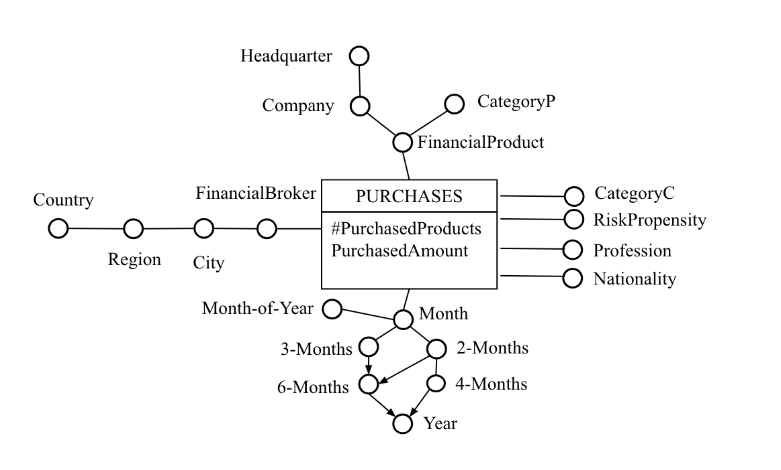

## Query 1

Show for each financial broker and four-month period the total number of purchased products
and the corresponding amount. Associate each record with a rank:

- which identifies the position of the record according to the total amount of purchases (1 for
  the lowest total value)
- which identifies the position of the record in descending order of the number of purchased
  products, separately by financial broker country


In [ ]:
SELECT
    IDFinancialBroker,
    FourMonths,
    SUM(PurchasedProducts),
    SUM(PurchasedAmount),
    RANK() OVER (
        ORDER BY
            SUM(PurchasedProducts) ASC
    ),
    RANK() OVER(
        PARTITION BY Country
        ORDER BY
            PurchasedProducts DESC
    )
FROM
    PURCHASES p,
    TIME t
WHERE
    p.IDTime == t.IDTime
GROUP BY
    IDFinancialBroker,
    FourMonths,
    Country

## Query 2

For financial products belonging to the derivative contracts category (CategoryP='Derivative
Contracts'), show separately for each financial broker and four-month period

- the total purchased amount
- the cumulative purchased amount from the beginning of the year as the 4-months periods
  pass, separately by financial broker,
- the total purchased amount independent of the financial broker


In [ ]:
SELECT
    IDFinancialBroker,
    FourMonths,
    SUM(PurchasedAmount),
    SUM(
        SUM(PurchasedAmount) OVER (
            PARTITION BY Year,
            IDFinancialBroker
            ORDER BY
                FourMonths ROWS UNBOUNDED PRECEDING
        )
    ),
    SUM(
        SUM(PurchasedAmount) OVER (PARTITION BY FourMonths)
    )
FROM
    FINANCIAL_PRODUCT fp,
    PURCHASES p,
    TIME t
WHERE
    fp.CategoryP == 'Derivative Contracts'
    AND fp.IDFinancialProduct == p.IDFinancialProduct
    AND p.IDTime == t.IDTime
GROUP BY
    IDFinancialBroker,
    FourMonths,
    Year

## Query 3

Show for each financial product, customer profession, and three-month period

- the number of purchased products,
- the average amount per purchased product,
- the average monthly amount,
- the percentage of the purchased amount with respect to the total purchased amount of
  financial products in the same Category, separately by customer profession and three-
  month period


In [ ]:
SELECT
    IDFinancialProduct,
    Profession,
    ThreeMonths,
    SUM(PurchasedProducts),
    SUM(PurchasedAmount) / SUM(PurchasedProducts),
    SUM(PurchasedAmount) / COUNT(DISTINCT Month),
    100 * SUM(PurchasedAmount) / SUM(
        SUM(PurchasedAmount) OVER (
            PARTITION BY CategoryP,
            Profession,
            ThreeMonths
        )
    )
FROM
    FINANCIAL_PRODUCT fp,
    CUSTOMER_FEATURES cf,
    TIME t,
    PURCHASES p
WHERE
    fp.IDFinancialProduct == p.IDFinancialProduct
    AND cf.IDCF == p.IDCF
    AND p.IDTime == t.IDTime
GROUP BY
    IDFinancialProduct,
    Profession,
    ThreeMonths,
    Month,
    CategoryP

# Question 11

The following data warehouse describes the subscription trends of insurance policies offered by
different companies through distribution networks (branches, brokers, agencies, etc.). Each
insurance product is issued by a specific company and pertains to only one branch of insurance
(life, vandalism, MTPL, etc.). For each distribution network, the city, province, region, and
corresponding geographic area are known. The data warehouse stores the gender, civil status,
profession, and age group of customers who have subscribed to insurance products over time
through the different distribution networks.
The metrics to be analyzed are the number of subscriptions, total duration, and the corresponding
premium amount. Metrics should be analyzed for each month, two-month, three-month, six-month,
year, three-year period, and five-year period.

```sql
CREATE TABLE DISTRIBUTION_NETWORK(
    IDDistributionNetwork INT PRIMARY KEY,
    DistributionNetwork VARCHAR(100),
    City VARCHAR(50),
    Province VARCHAR(50),
    Region VARCHAR(50),
    GeographicArea VARCHAR(50)
);

CREATE TABLE INSURANCE_PRODUCT(
    IDInsuranceProduct INT PRIMARY KEY,
    InsuranceProduct VARCHAR(100),
    Company VARCHAR(100),
    InsuranceBranch VARCHAR(100)
);

CREATE TABLE CUSTOMER_FEATURES(
    IDCF INT PRIMARY KEY,
    AgeRange VARCHAR(50),
    Gender CHAR(1),
    CivilStatus VARCHAR(50),
    Profession VARCHAR(100)
);

CREATE TABLE TIME(
    IDTime INT PRIMARY KEY,
    Month INT,
    TwoMonths INT,
    ThreeMonths INT,
    SixMonths INT,
    Year INT,
    ThreeYears INT,
    FiveYears INT
);

CREATE TABLE SUBSCRIPTIONS(
    IDDistributionNetwork INT,
    IDInsuranceProduct INT,
    IDCF INT,
    IDTime INT,
    Subscriptions INT,
    PremiumsAmount INT,
    Duration INT,
    PRIMARY KEY (
        IDDistributionNetwork,
        IDInsuranceProduct,
        IDCF,
        IDTime
    ),
    FOREIGN KEY (IDDistributionNetwork) REFERENCES DISTRIBUTION_NETWORK(IDDistributionNetwork),
    FOREIGN KEY (IDInsuranceProduct) REFERENCES INSURANCE_PRODUCT(IDInsuranceProduct),
    FOREIGN KEY (IDCF) REFERENCES CUSTOMER_FEATURES(IDCF),
    FOREIGN KEY (IDTime) REFERENCES TIME(IDTime)
);
```

Given the above logical schema, consider the following queries of interest:

1. Separately by quarter (3-Months attribute) and profession, show the total amount of
   premiums and the average duration of subscriptions.
2. Considering female clients (value 'F' of the Gender attribute), separately by year and
   distribution geographic area, show the total amount and the average 3-month amount of
   premiums.
3. For subscriptions made in the geographical area 'North,' show the total number of
   subscriptions and the corresponding average duration, separately by distribution region and
   year.


## Request 1

Define a materialized view with CREATE MATERIALIZED VIEW, so as to reduce the
response time of the queries of interest (a) to (c) above. Specifically, specify the SQL query
associated with Block A in the following statement:

```sql
CREATE MATERIALIZED VIEW ViewSubscriptions
BUILD IMMEDIATE
REFRESH FAST ON COMMIT
AS
Block A
```


In [ ]:
Block A
SELECT
    Profession,
    Gender,
    ThreeMonths,
    Year,
    Region,
    GeographicArea SUM(PremiumsAmount) AS TotPremiums,
    SUM(Subscriptions) AS TotSubscriptions,
    SUM(Duration) AS TotDuration
FROM
    TIME t,
    CUSTOMER_FEATURES cf,
    SUBSCRIPTIONS s,
    DISTRIBUTION_NETWORK dn
WHERE
    t.IDTime == s.IDTime
    AND s.IDCF == cf.IDCF
    AND s.IDDistributionNetwork == dn.IDDistributionNetwork
GROUP BY
    Profession,
    Gender,
    ThreeMonths,
    Year,
    Region,
    GeographicArea;

## Request 2

Define the **minimal set** of attributes that allows identification of the tuples belonging to the
materialized ViewSubscriptions view.


In [ ]:
(ThreeMonths, Profession, Gender, Region)

## Request 3

Assume that the management of the materialized view (derived table) is carried out by
means of triggers. Write the trigger to propagate to the ViewSubscriptions materialized view
the changes due to the insertion of a new record into the SUBSCRIPTIONS table.


In [ ]:
CREATE
OR REPLACE TRIGGER TriggerViewSubscriptions
AFTER
INSERT
    ON SUBSCRIPTIONS FOR EACH ROW DECLARE N NUMBER;

VarProfession,
VarGender,
VarRegion,
VarGeographicArea VARCHAR(10);

VarYear,
VarThreeMonths DATE;

BEGIN
SELECT
    Profession,
    Gender INTO VarProfession,
    VarGender
FROM
    CUSTOMER_FEATURES cf
WHERE
    cf.IDCF == :NEW.IDCF;

SELECT
    Region,
    GeographicArea INTO VarRegion,
    VarGeographicArea
FROM
    DISTRIBUTION_NETWORK dn
WHERE
    dn.IDDistributionNetwork == :NEW.IDDistributionNetwork;

SELECT
    Year,
    ThreeMonths INTO VarYear,
    VarThreeMonths
FROM
    TIME t
WHERE
    t.IDTime == :NEW.IDTime;

SELECT
    COUNT(*) INTO N
FROM
    ViewSubscriptions vs
WHERE
    ThreeMonths == VarThreeMonths
    AND Profession == VarProfession
    AND Gender == VarGender
    AND Region == VarRegion;

IF (N == 0) THEN
INSERT INTO
    ViewSubscriptions(
        Profession,
        Gender,
        ThreeMonths,
        Year,
        Region,
        GeographicArea,
        TotPremiums,
        TotSubscriptions,
        TotDuration
    )
VALUES
    (
        VarProfession,
        VarGender,
        VarThreeMonths,
        VarYear,
        VarRegion,
        VarGeographicArea,
        :NEW.PremiumsAmount,
        :NEW.Subscriptions,
        :NEW.Duration
    );

ELSE
UPDATE
    ViewSubscriptions vs
SET
    TotPremiums = TotPremiums + :NEW.PremiumsAmount,
    TotSubscriptions = TotSubscriptions + :NEW.Subscriptions,
    TotDuration = TotDuration + :NEW.Duration
WHERE
    vs.ThreeMonths == VarThreeMonths
    AND vs.Profession == VarProfession
    AND vs.Gender == VarGender
    AND vs.Region == VarRegion;

END IF;

END;